In [54]:
import numpy as np
import pylab as plt
import scipy

def db(x):
    return 10*np.log10(x)

In [55]:
import scipy.signal as signal
#d = np.fromfile(open("../data/test_multiple_v2.fc32"), dtype=np.complex64)
d = np.fromfile(open("../data/ponui1.fc32"), dtype=np.complex64)
d = d[:19456000]

f0 = 160.425e6    # Center frequency
Fs = 768e3        # Sampling rate
N_fft = 1024      # Number of FFT channels

# Generate array of channel frequencies
f = (np.fft.fftshift(np.fft.fftfreq(N_fft, 1/Fs)) + f0) / 1e6

# Time tag each sample
t = np.arange(len(d)) / Fs

# Reshape so we can do an FFT over an axis
d_fft = d.reshape((-1, N_fft))
D = np.fft.fftshift(np.fft.fft(d_fft, axis=1))

# Time tag each sample coming from a channel
T = np.arange(len(D)) / Fs * N_fft

# Now convert into power spectral density
# 1. Reshape to (N_timestep, N_int_per_timestep, N_fft)
# 2. Square
# 3. Sum over N_int_per_timestep axis
N_time_PSD = 1000
PSD = (np.abs(D.reshape((N_time_PSD, -1, N_fft)))**2).mean(axis=1) # N_fft = 1024 - > (1000, 15, 1024) where initial shape was 15 million or so

# Create overall spectrum
spec = PSD.mean(axis=0)

# Find peaks (note: I hand-tuned prominence)
p = signal.find_peaks(spec, prominence=0.000005)[0]

In [4]:
import numpy as np
d = np.fromfile(open("../data/test_windows_bottom_mtn.fc32"), dtype=np.complex64)
print(len(d))


7680000


In [44]:
p


array([519], dtype=int64)

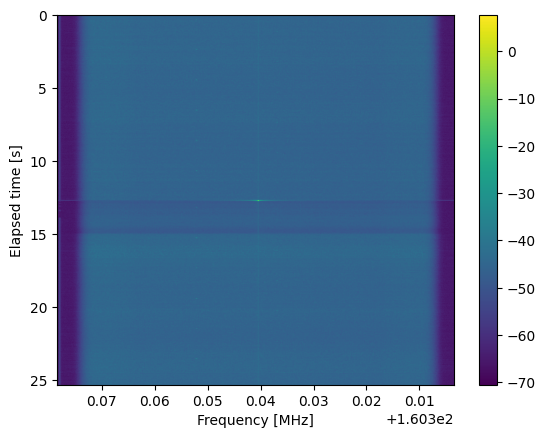

In [57]:
plt.figure()
plt.imshow(db(PSD), aspect='auto', extent=(f[450], f[350], T[-1], T[0]))
plt.xlabel("Frequency [MHz]")
plt.ylabel("Elapsed time [s]")
plt.colorbar()
plt.show()

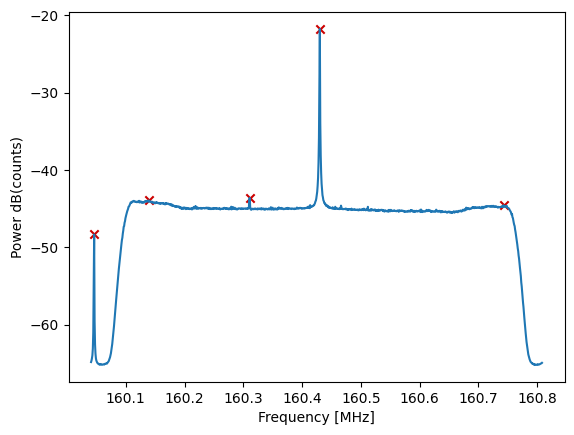

In [ ]:
plt.figure()
plt.plot(f, db(spec))
plt.scatter(f[p], db(spec)[p], marker='x', color='#cc0000')
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power dB(counts)")
plt.show()

In [ ]:
# Extract the time series for each channel identified
t_kiwis = []
for idx in p:
    t_kiwis.append(D[:, idx])

# And extract the carrier frequencies
f_kiwis = f[p]

In [ ]:
plt.figure(figsize=(6, len(p) * 2))

for ii, tk in enumerate(t_kiwis):
    plt.subplot(len(p), 1, ii+1)
    plt.plot(T, np.abs(tk))
    plt.title(f"Kiwi {ii+1}, ({f_kiwis[ii]:.3f} MHz)")
    plt.xlabel("Time [s]")
    
plt.tight_layout()

In [13]:
import numpy as np

d = np.fromfile(open("../data/ponui1.fc32"), dtype=np.complex64)
d = d[:19456000]

f0 = 160.425e6    # Center frequency
Fs = 768e3        # Sampling rate
N_fft = 1024      # Number of FFT channels

# Generate array of channel frequencies
f = (np.fft.fftshift(np.fft.fftfreq(N_fft, 1/Fs)) + f0) / 1e6

# Input data
# Center frequencies of selected channels
channel_center_frequencies_mhz = [160.300, 160.400]
# Detected peak indices from FFT
fft_peak_indices = [512, 340] # this should correspond to 160.425 MHz

# Function to determine valid FFT indices that fall within any of the desired channel bands
def get_valid_fft_indices(f, center_frequencies_mhz, channel_bandwidth_mhz=0.01):
    valid_indices = set()
    for center_frequency in center_frequencies_mhz:
        lower_bound = center_frequency - channel_bandwidth_mhz / 2
        upper_bound = center_frequency + channel_bandwidth_mhz / 2
        # Find all indices where the frequency falls within the channel bounds
        matching_indices = np.where((f >= lower_bound) & (f < upper_bound))[0]
        valid_indices.update(matching_indices)
        print(f"Valid indicies {valid_indices}")
    return valid_indices

# Get the set of valid FFT indices for the desired channels
valid_fft_indices = get_valid_fft_indices(f, channel_center_frequencies_mhz)

# Filter the detected peaks to retain only those within the desired channel bands
filtered_peak_indices = []
for index in fft_peak_indices:
    if index in valid_fft_indices:
        filtered_peak_indices.append(index)

print(filtered_peak_indices)
print(f"{f[filtered_peak_indices]} Mhz")


Valid indicies {339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351}
Valid indicies {339, 340, 341, 342, 343, 472, 473, 474, 475, 476, 477, 344, 345, 346, 347, 348, 349, 350, 351, 478, 479, 480, 481, 482, 483, 484, 485}
[340]
[160.296] Mhz
